# Практическая работа №12
## Задание:
### Реализовать нейронную сеть для определения тональности отзывов фильмов

## Решение:

### 1. В качестве данных загрузить набор IMDb movie review из keras:

In [3]:
from keras.datasets import imdb

max_words = 10000

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 [==============================] - 8s 0us/step


### 2. Далее необходимо все тексты привести к одной размерности. 
Для этого необходимо использовать функцию pad_sequences, где необходимо указать финальную размерность с помощью параметра maxlen. Параметр padding показывает, куда добавлять 0, если длина исходного текста была меньше 200

In [4]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 200

x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)

### 3. Создать модель типа Sequential, куда необходимо будет добавить слои. 
Далее добавить Dense слои, в конце обязательно должен быть Dense слой с одним нейроном (так как задача бинарной классификации и на выходе будет значение 0 или 1, в качестве функции активации лучше использовать сигмоидальную функцию, так как она лучше всего подходит к этой задаче). Количество скрытых слоев и их параметры задайте самостоятельно.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

### 4. Настройте модель с помощью метода compile. 
В качестве функции потерь используйте binary_crossentropy, а в качестве метрики accuracy.

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1)                 1601      
                                                                 
Total params: 81601 (318.75 KB)
Trainable params: 81601 (318.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. Далее обучите модель на тренировочных данных и постройте графики обучения модели на разных эпохах:

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6127 - acc: 0.6805 - val_loss: 0.4377 - val_acc: 0.8202
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3336 - acc: 0.8680 - val_loss: 0.3124 - val_acc: 0.8746
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2486 - acc: 0.9044 - val_loss: 0.2932 - val_acc: 0.8820
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2080 - acc: 0.9210 - val_loss: 0.3015 - val_acc: 0.8762
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1816 - acc: 0.9322 - val_loss: 0.2868 - val_acc: 0.8836
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1583 - acc: 0.9430 - val_loss: 0.2925 - val_acc: 0.8812
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1394 - acc: 0.9495 - val_loss: 0.3017 - val_acc: 0.8768
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

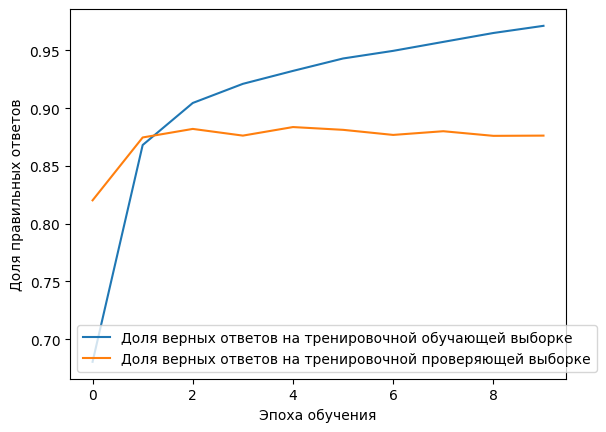

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label = 'Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_acc'], label = 'Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

### 6. Проверьте полученную модель на тестовых данных. Объясните результаты.

In [14]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3396 - acc: 0.8711


[0.33962684869766235, 0.8711199760437012]

### 7. Теперь для тех же данных постройте другую модель. 
В нее необходимо включить: 
#### 1. слой Embedding (его параметры: кол-во слов (max_words)
#### 2. длина вектора слова (итоговая)
#### 3. длина входных векторов текстов (maxlen)
Например, Embedding(max_words,2,input_length=maxlen)), слой SimpleRNN (с кол-вом нейронов в нем) и Dense (последний, такой же, как и в первой части). Точно также настроить модель, обучить ее и построить графики обучения.

In [15]:
from keras.layers import SimpleRNN

model2 = Sequential()
model2.add(Embedding(max_words, 2, input_length=maxlen))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 2)            20000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21153 (82.63 KB)
Trainable params: 21153 (82.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 13s 19ms/step - loss: 0.6906 - acc: 0.5271 - val_loss: 0.6658 - val_acc: 0.6244
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.5156 - acc: 0.7531 - val_loss: 1.1521 - val_acc: 0.5750
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3732 - acc: 0.8426 - val_loss: 0.3571 - val_acc: 0.8490
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3224 - acc: 0.8683 - val_loss: 0.4127 - val_acc: 0.8206
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2884 - acc: 0.8855 - val_loss: 0.3512 - val_acc: 0.8602
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2675 - acc: 0.8952 - val_loss: 0.4022 - val_acc: 0.8532
Epoch 7/10
625/625 [==============================] - 12s 20ms/step - loss: 0.2503 - acc: 0.9050 - val_loss: 0.3540 - val_acc: 0.8466
Epoch 8/10
625/625 [==============================] - 12s 20ms

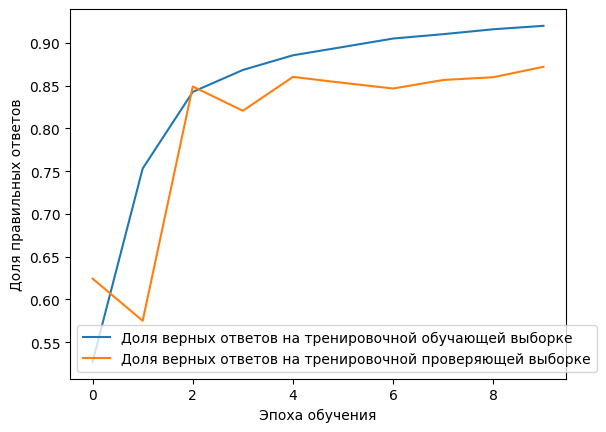

In [17]:
plt.plot(history2.history['acc'], label = 'Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history2.history['val_acc'], label = 'Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [18]:
model2.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.3321 - acc: 0.8648


[0.33212825655937195, 0.864799976348877]

### 8. Постройте разные вариации модели 
Измените параметры при загрузке данных (max_words, maxlen) и параметры слоев модели. 
Сравните результаты.

In [19]:
# Iterate over max_words and maxlen with different values with step 1000 for max_words and 50 for maxlen 
# Do that for 10 times
# Than visualize results (accuracy and loss) for each model

acc_list = []
val_acc_list = []
loss_list = []
val_loss_list = []

for i in range(10):
    max_words = 10000 + i * 1000
    maxlen = 200 + i * 50
    print("max_words = ", max_words, " maxlen = ", maxlen)
    (x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_words)
    x_train = pad_sequences(x_train,maxlen=maxlen)
    x_test = pad_sequences(x_test,maxlen=maxlen)
    model = Sequential()
    model.add(Embedding(max_words, 8, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    acc_list.append(history.history['acc'])
    val_acc_list.append(history.history['val_acc'])
    loss_list.append(history.history['loss'])
    val_loss_list.append(history.history['val_loss'])

max_words =  10000  maxlen =  200
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6222 - acc: 0.6690 - val_loss: 0.4549 - val_acc: 0.8176
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3403 - acc: 0.8676 - val_loss: 0.3168 - val_acc: 0.8704
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2494 - acc: 0.9035 - val_loss: 0.2904 - val_acc: 0.8804
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2078 - acc: 0.9201 - val_loss: 0.2871 - val_acc: 0.8828
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1790 - acc: 0.9340 - val_loss: 0.2896 - val_acc: 0.8824
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1560 - acc: 0.9434 - val_loss: 0.3000 - val_acc: 0.8804
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1355 - acc: 0.9529 - val_loss: 0.3026 - val_acc: 0.8826
Epoch 8/10
625/625 [======================

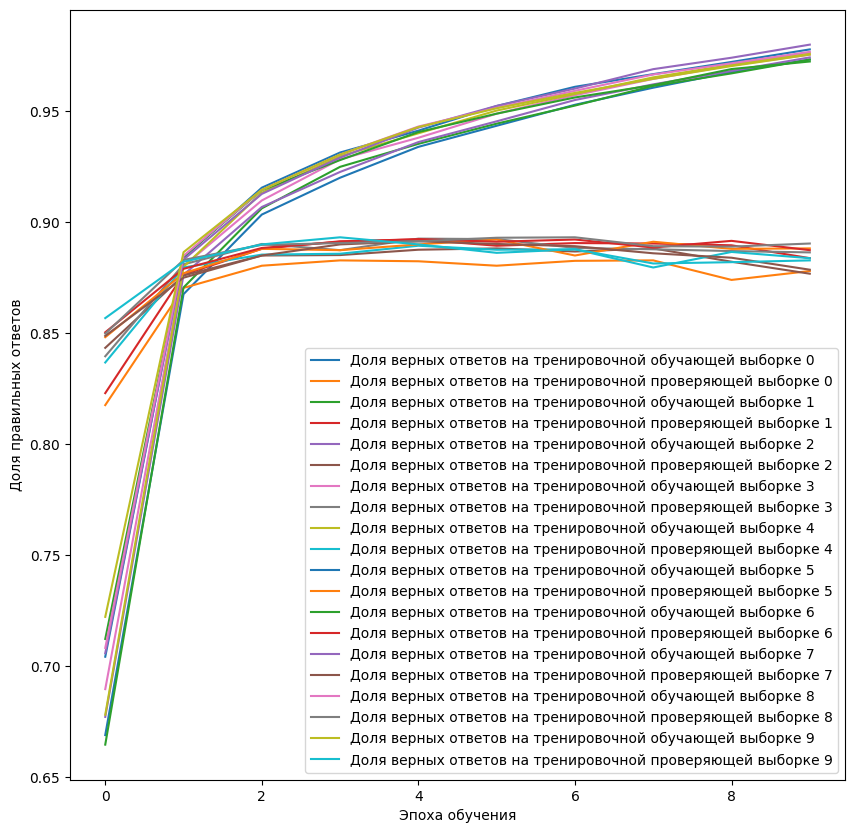

In [21]:
# Visualize results on 1 plot
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.plot(acc_list[i], label = 'Доля верных ответов на тренировочной обучающей выборке '+str(i))
    plt.plot(val_acc_list[i], label = 'Доля верных ответов на тренировочной проверяющей выборке '+str(i))
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля правильных ответов')
    plt.legend()
plt.show()

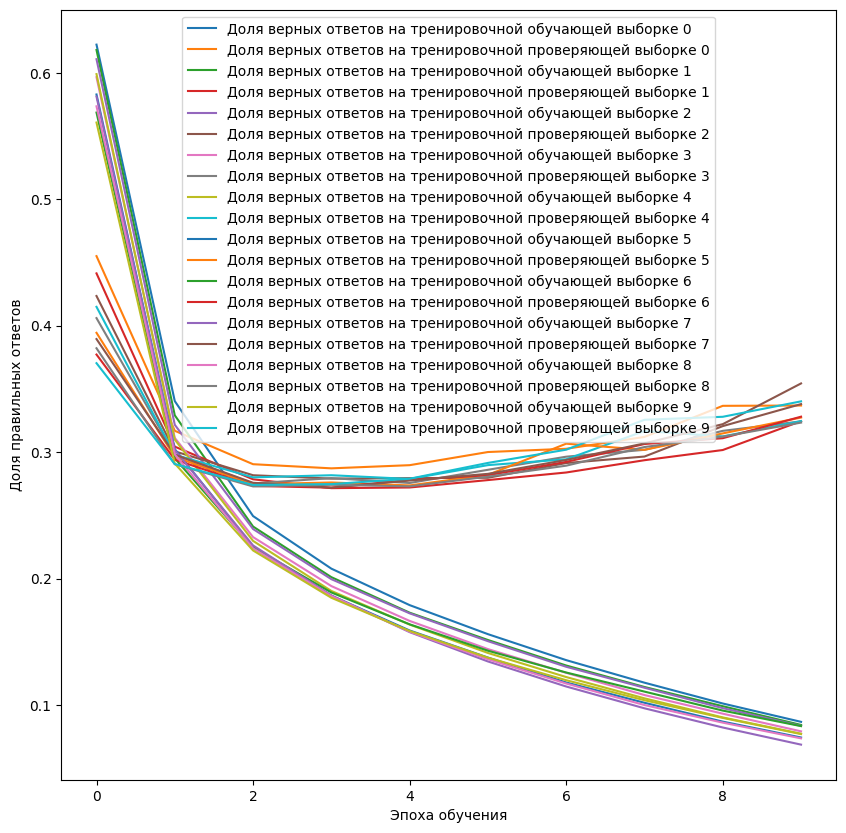

In [22]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.plot(loss_list[i], label = 'Доля верных ответов на тренировочной обучающей выборке '+str(i))
    plt.plot(val_loss_list[i], label = 'Доля верных ответов на тренировочной проверяющей выборке '+str(i))
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля правильных ответов')
    plt.legend()
plt.show()

In [23]:
# Iterate over max_words and maxlen with different values with step 1000 for max_words and 50 for maxlen
# Do that for 10 times
# Than visualize results (accuracy and loss) for each model

acc_list = []
val_acc_list = []
loss_list = []
val_loss_list = []

for i in range(10):
    max_words = 10000 + i * 1000
    maxlen = 200 + i * 50
    print("max_words = ", max_words, " maxlen = ", maxlen)
    (x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_words)
    x_train = pad_sequences(x_train,maxlen=maxlen)
    x_test = pad_sequences(x_test,maxlen=maxlen)
    model2 = Sequential()
    model2.add(Embedding(max_words, 2, input_length=maxlen))
    model2.add(SimpleRNN(32))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history2 = model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    acc_list.append(history2.history['acc'])
    val_acc_list.append(history2.history['val_acc'])
    loss_list.append(history2.history['loss'])
    val_loss_list.append(history2.history['val_loss'])

max_words =  10000  maxlen =  200
Epoch 1/10
625/625 [==============================] - 14s 20ms/step - loss: 0.6927 - acc: 0.5142 - val_loss: 0.6870 - val_acc: 0.5444
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.6597 - acc: 0.6077 - val_loss: 0.5793 - val_acc: 0.7176
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.4604 - acc: 0.7918 - val_loss: 0.4057 - val_acc: 0.8302
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3685 - acc: 0.8495 - val_loss: 0.3842 - val_acc: 0.8408
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3177 - acc: 0.8713 - val_loss: 0.3827 - val_acc: 0.8472
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2841 - acc: 0.8895 - val_loss: 0.3515 - val_acc: 0.8630
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2747 - acc: 0.8977 - val_loss: 0.3570 - val_acc: 0.8528
Epoch 8/10
625/625 [========

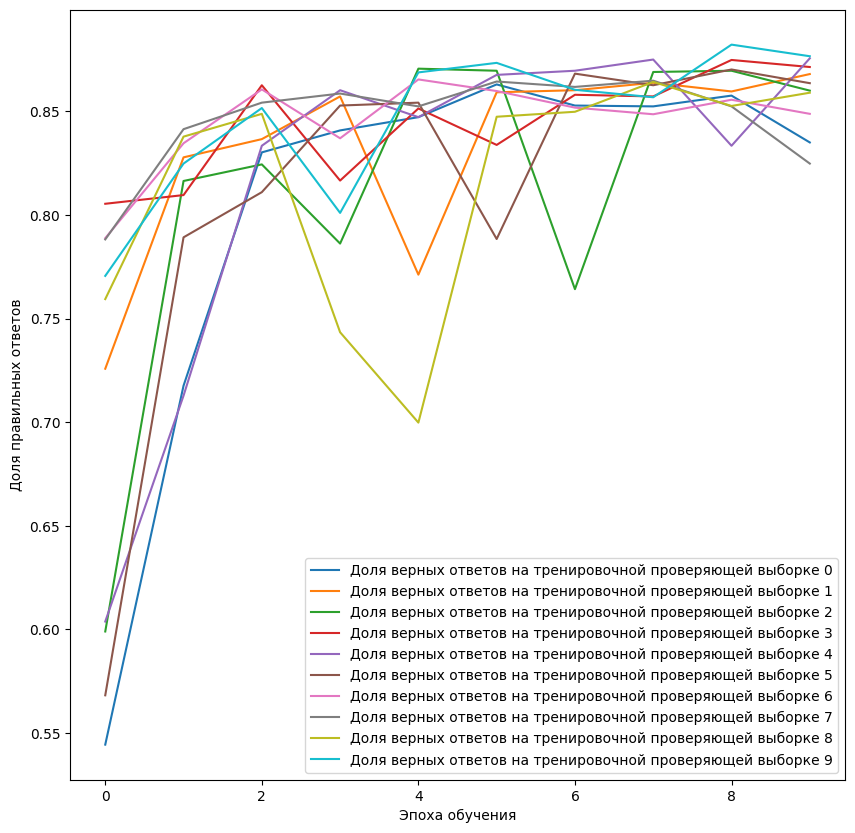

In [27]:
# Visualize results on 1 plot
plt.figure(figsize=(10, 10))
for i in range(10):
    #plt.plot(acc_list[i], label = 'Доля верных ответов на тренировочной обучающей выборке '+str(i))
    plt.plot(val_acc_list[i], label = 'Доля верных ответов на тренировочной проверяющей выборке '+str(i))
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля правильных ответов')
    plt.legend()
plt.show()

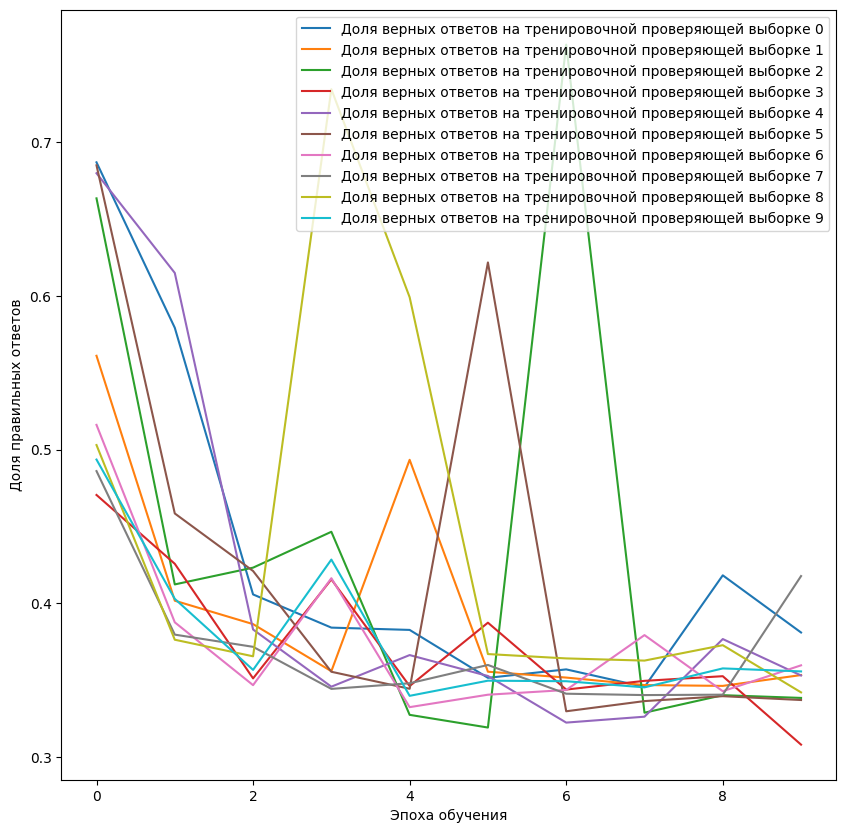

In [28]:
plt.figure(figsize=(10, 10))
for i in range(10):
    #plt.plot(loss_list[i], label = 'Доля верных ответов на тренировочной обучающей выборке '+str(i))
    plt.plot(val_loss_list[i], label = 'Доля верных ответов на тренировочной проверяющей выборке '+str(i))
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля правильных ответов')
    plt.legend()
plt.show()